In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats library from numpy
from scipy import stats

# Therse are the plotting modules:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plot appear in the iPython Notebook
%matplotlib inline

In [2]:
dataset = randn(25)

(0, 1)

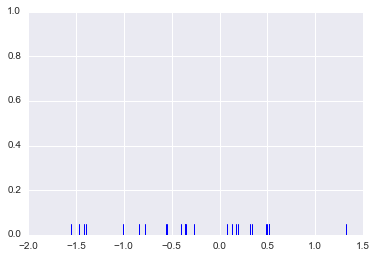

In [5]:
sns.rugplot(dataset)
plt.ylim(0,1)

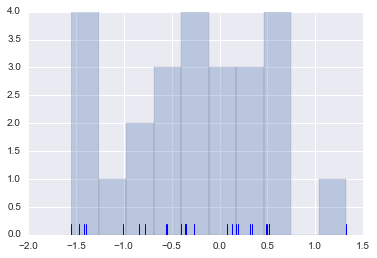

In [6]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

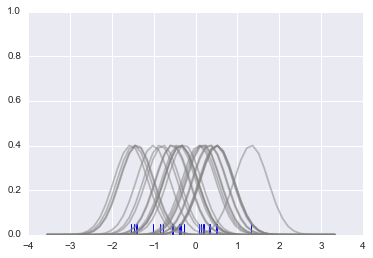

In [7]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max)

#kernel equation
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []
for data_point in dataset:
    
    # Create a kernel for each point and appen it to th kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)

plt.ylim(0,1)

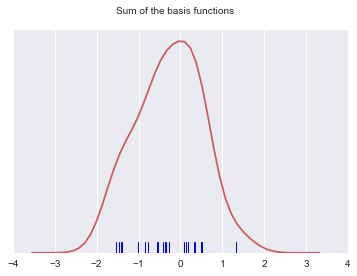

In [9]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset)

#get rid of ticks on y
plt.yticks([])

plt.suptitle("Sum of the basis functions")

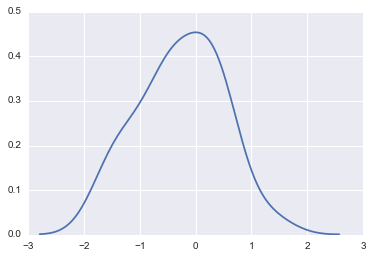

In [10]:
sns.kdeplot(dataset)

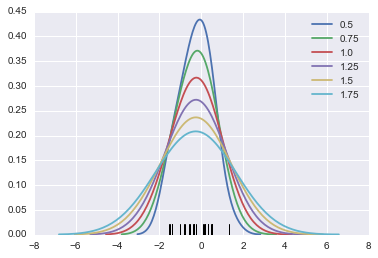

In [11]:
sns.rugplot(dataset,color='black')
#kernel density plot for varying bandwidths
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

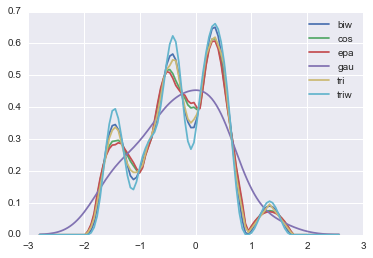

In [12]:
#different types of kernel plots
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

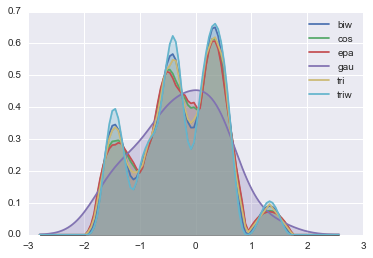

In [13]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True)

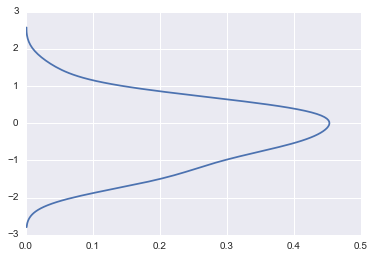

In [14]:
sns.kdeplot(dataset,vertical=True)

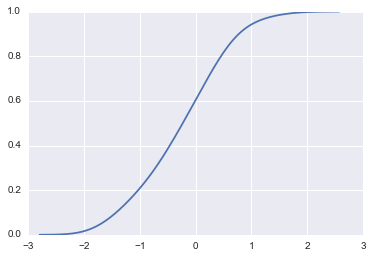

In [16]:
#for cumulative distribution function
sns.kdeplot(dataset,cumulative = True)

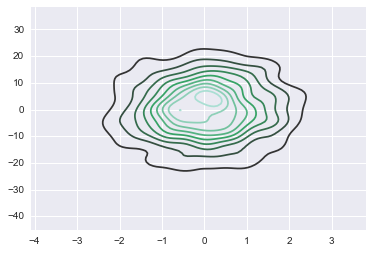

In [17]:
mean = [0,0]
cov = [[1,0],[0,100]]  # Covariance
dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

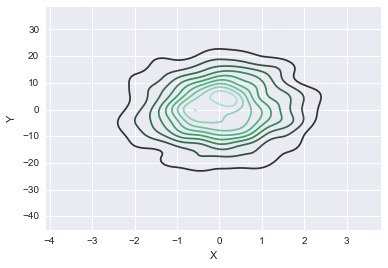

In [18]:
#if you want to pass two seperate vectors instead
sns.kdeplot(dframe.X,dframe.Y)

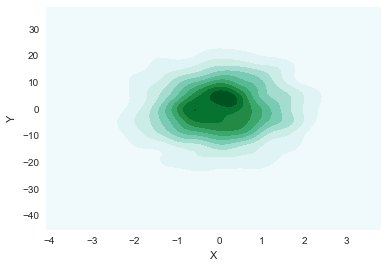

In [19]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

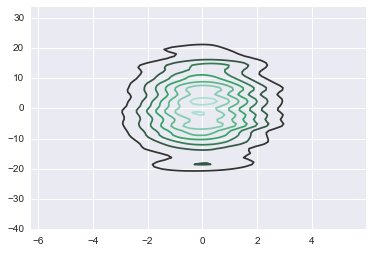

In [20]:
#specify bandwidth
sns.kdeplot(dframe,bw=1)

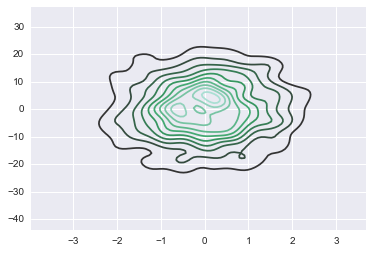

In [21]:
sns.kdeplot(dframe,bw='silverman')

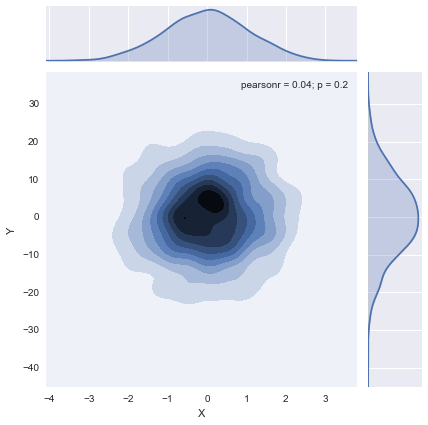

In [22]:
sns.jointplot('X','Y',dframe,kind='kde')